In [64]:
import yfinance as yf

In [65]:
df=yf.download('BTC-USD')

[*********************100%***********************]  1 of 1 completed


In [66]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2023-07-03,30624.515625,31375.613281,30586.513672,31156.439453,31156.439453,15271884873
2023-07-04,31156.865234,31325.197266,30659.355469,30777.582031,30777.582031,12810828427
2023-07-05,30778.724609,30877.330078,30225.613281,30514.166016,30514.166016,12481622280


In [67]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import math
import statsmodels.api as sm

from sklearn.metrics import mean_squared_error, mean_absolute_error

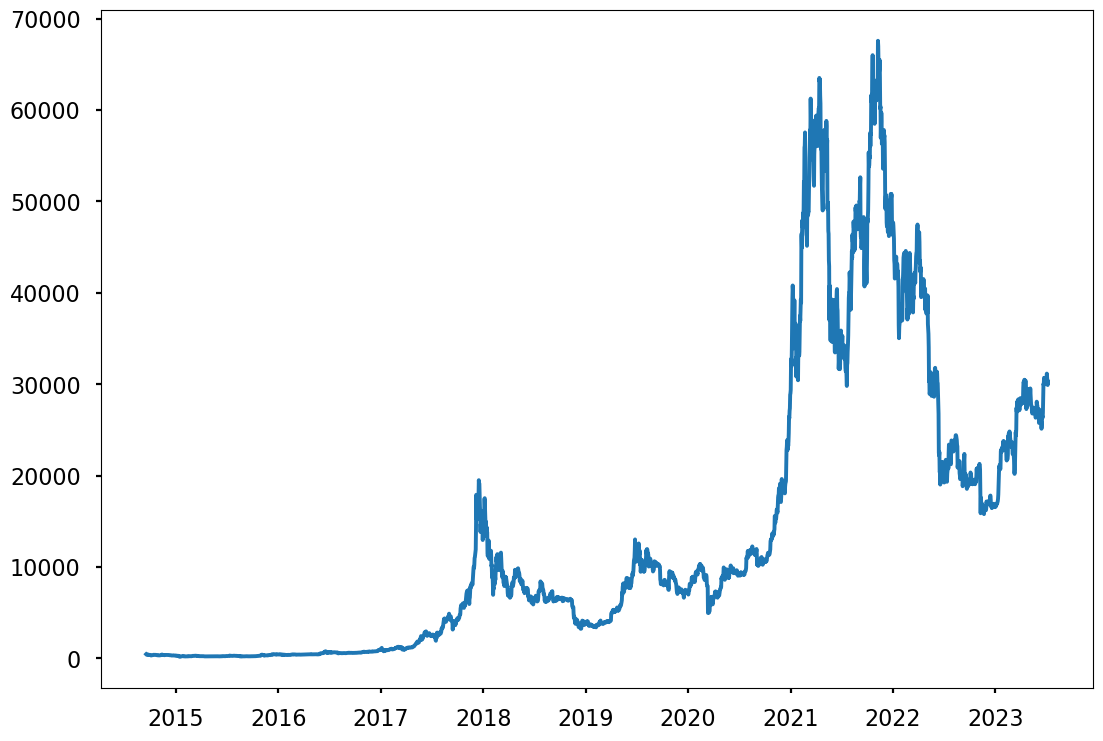

In [68]:
plt.plot(df.index, df['Adj Close'])

In [69]:
# train test split
trow=int(len(df)*0.9)

In [70]:
training_data=list(df[0:trow]['Adj Close'])


In [71]:
 testing_data=list(df[trow:]['Adj Close'])
    

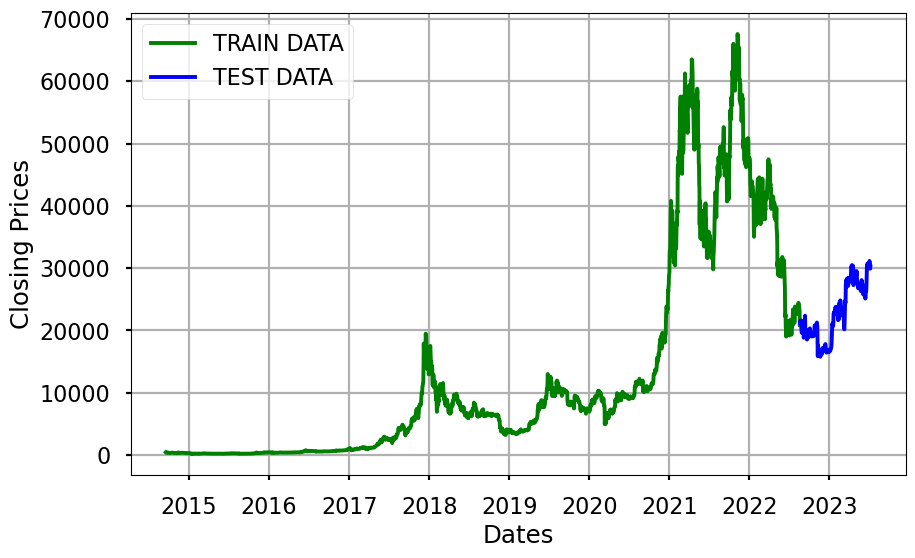

In [72]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df[0:trow]['Adj Close'], 'green', label='TRAIN DATA')
plt.plot(df[trow:]['Adj Close'], 'blue', label='TEST DATA')
plt.legend()

In [80]:
model_pred=[]
no_of_obser=len(testing_data)

In [81]:
for i in range(no_of_obser):
    model=sm.tsa.arima.ARIMA(training_data, order=(7,1,0))
    model_fit=model.fit()
    output=model_fit.forecast()
    yhat=list(output)
    model_pred.append(yhat)
    actual_test_value=testing_data[i]
    training_data.append(actual_test_value)
   

In [82]:
print(len(model_pred))
print(len(testing_data))

322
322


In [83]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3859
Model:                 ARIMA(7, 1, 0)   Log Likelihood              -31183.771
Date:                Sat, 08 Jul 2023   AIC                          62383.542
Time:                        02:48:54   BIC                          62433.606
Sample:                             0   HQIC                         62401.321
                               - 3859                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0264      0.009     -2.932      0.003      -0.044      -0.009
ar.L2          0.0203      0.009      2.318      0.020       0.003       0.037
ar.L3          0.0203      0.010      2.119      0.034       0.002       0.039
ar.L4          0.0271      0.008      3.411      0.001       0.012       0.043
ar.L5          0.0066      0.008      0.788      0.431      -0.010       0.023
ar.L6          0.0287      0.008      3.537      0.000       0.013       0.045
ar.L7         -0.0348      0.008     -4.616      0.000      -0.050      -0.020
sigma2      6.152e+05   4042.022    152.201      0.000    6.07e+05    6.23e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             87017.93
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):              11.22   Skew:                            -0.99
Prob(H) (two-sided):                  0.00   Kurtosis:                        26.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

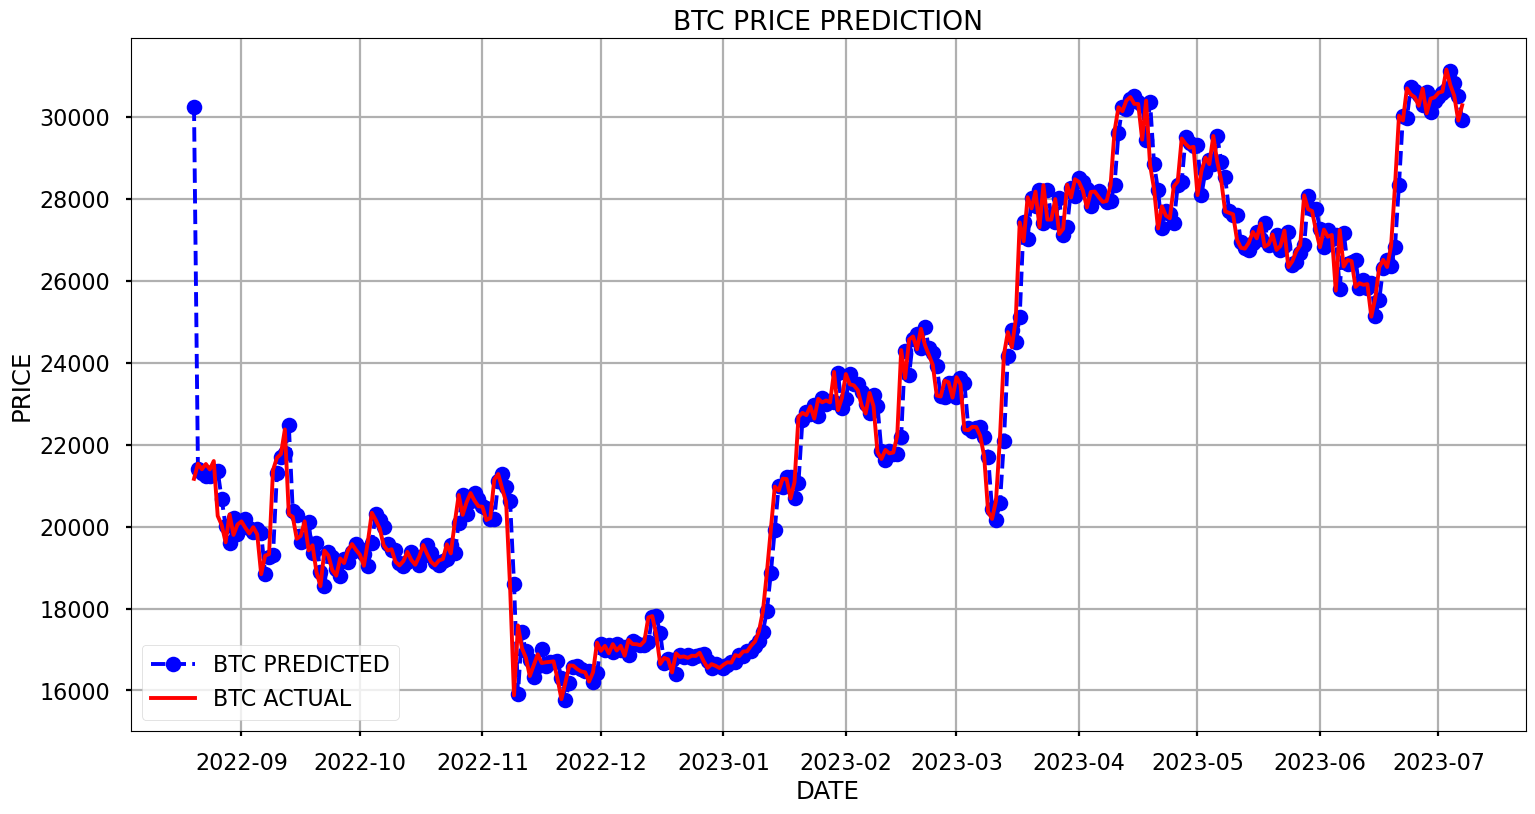

In [85]:
plt.figure(figsize=(18,9))
plt.grid(True)
date_range=df[trow:].index
plt.plot(date_range, model_pred, color='blue', marker='o', linestyle="dashed", label="BTC PREDICTED")
plt.plot(date_range, testing_data, color='red', label="BTC ACTUAL")
plt.title("BTC PRICE PREDICTION")
plt.xlabel('DATE')
plt.ylabel('PRICE')
plt.legend()
plt.show()

In [87]:
#report performance
mape=np.mean(np.abs(np.array(model_pred)-np.array(testing_data))/np.abs(testing_data))
print('MAPE: '+str(mape))

MAPE: 0.2356473564252362
